# Quantitative Analysis of Price & Daily Returns
* Can returns be described with a normal distribution?
* Is daily change non-zero?
* Can price movement be described as a random walk?

### 1. Set up environment 

In [1]:
# %pip install pandas_datareader

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 6
import seaborn as sb
sb.set()
import pandas_datareader as pdr
import yfinance as yf

### 2.  Download stock price data, store in dataframe

In [9]:
ticker = yf.Ticker("AMZN")
amzn = ticker.history(period="5y")

### 3. Take a look at the data

In [10]:
amzn.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-08-07 00:00:00-04:00,88.699501,89.946503,87.849998,89.669998,90538000,0.0,0.0
2019-08-08 00:00:00-04:00,90.300003,91.712997,89.905502,91.644501,74024000,0.0,0.0
2019-08-09 00:00:00-04:00,91.447502,91.554497,90.111000,90.378998,57596000,0.0,0.0
2019-08-12 00:00:00-04:00,89.799500,90.049004,88.849998,89.246002,58110000,0.0,0.0
2019-08-13 00:00:00-04:00,89.150002,91.586998,89.000000,91.217003,79880000,0.0,0.0


### 4. Store instantaneous rate of return in separate series

In [11]:
amzn_return = round(np.log(amzn.Close).diff() * 100, 2)
amzn_return.dropna(inplace = True)
amzn_return.head()

Date
2019-08-08 00:00:00-04:00    2.18
2019-08-09 00:00:00-04:00   -1.39
2019-08-12 00:00:00-04:00   -1.26
2019-08-13 00:00:00-04:00    2.18
2019-08-14 00:00:00-04:00   -3.42
Name: Close, dtype: float64

### 5. Plot the series 

<Axes: xlabel='Date'>

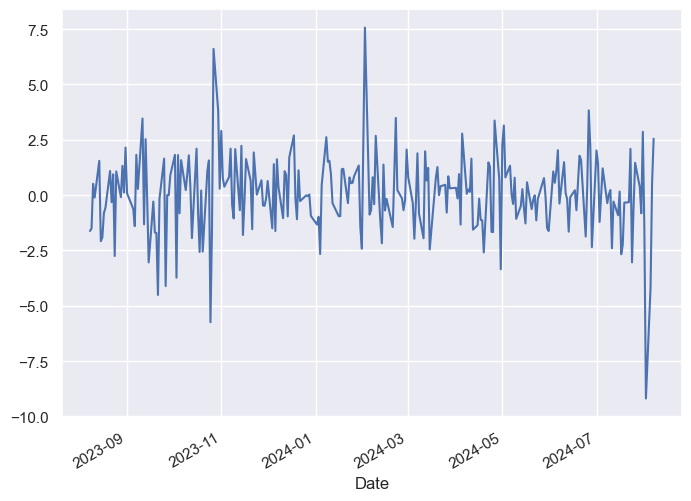

In [13]:
amzn_return[-252:].plot()

### 6. Pandas describe function gives descriptive statistics, default assumes you are dealing with a sample Pandas also deals with missing values by omitting them 

In [15]:
amzn_return.describe()

count    1258.000000
mean        0.049022
std         2.232420
min       -15.140000
25%        -1.110000
50%         0.060000
75%         1.210000
max        12.690000
Name: Close, dtype: float64

### 7. An alternative more slightly  different table of descriptives from scipy stats

In [16]:
from scipy import stats

In [19]:
n, minmax, mean, var, skew, kurt = stats.describe(amzn_return)
mini, maxi = minmax
std = var ** .5
stats.describe(amzn_return)

DescribeResult(nobs=1258, minmax=(-15.14, 12.69), mean=0.04902225755166931, variance=4.983698406823221, skewness=-0.12845756051760254, kurtosis=4.383269050808355)

### 9. for comparision generate random numbers that follow normal distribution


In [20]:
from scipy.stats import norm

In [21]:
x = norm.rvs(mean, std, n)

In [22]:
stats.describe(x)

DescribeResult(nobs=1258, minmax=(-7.590852502973266, 6.91970870287388), mean=0.03588136853050474, variance=5.0436608830642715, skewness=-0.08686699885017928, kurtosis=-0.10758761657673244)

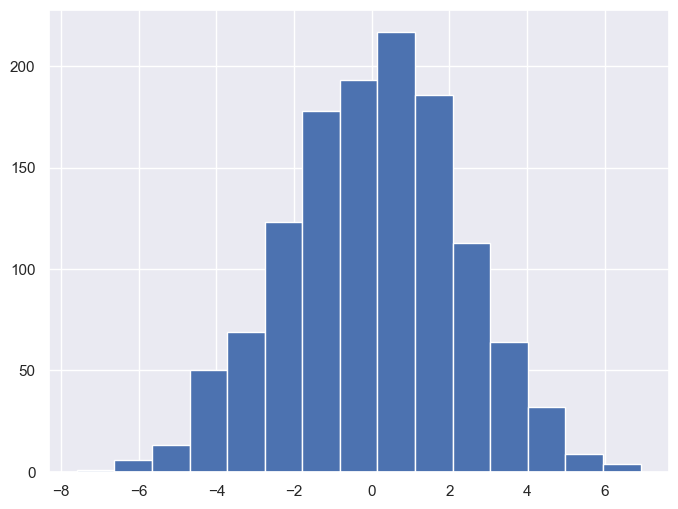

In [26]:
_ = plt.hist(x, bins=15)

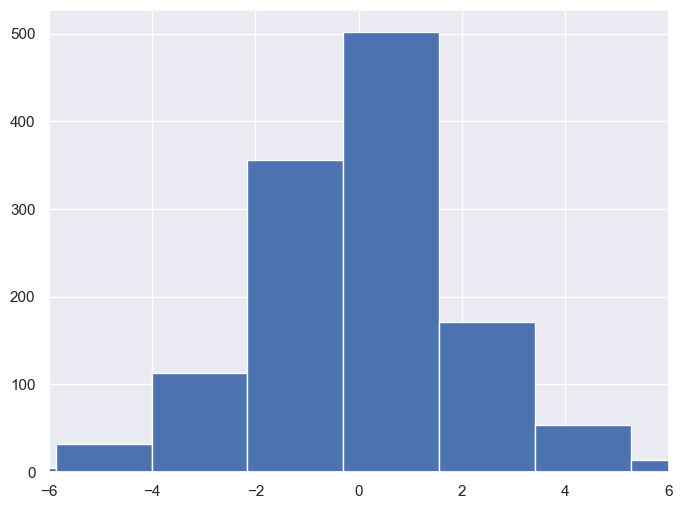

In [31]:
plt.hist(amzn_return, bins = 15)
plt.xlim(-6,6)
_ = plt.show()

## Is price change normally distributed?

### 10. Use scipy stats to test the kurtosis, the null hypothesis is that the sample is drawn from a population where the underlying kurtosis is that of a normally distributed variable

In [33]:
x_test = stats.kurtosistest(x)
amzn_test = stats.kurtosistest(amzn_return)
print(f'{"     Test statistic":20}{"p-value":>15}')
print(f'{" "*5}{"-"* 30}')
print(f"x:{x_test[0]:>17.2f}{x_test[1]:16.4f}")
print(f"AMZN: {amzn_test[0]:13.2f}{amzn_test[1]:16.4f}")

     Test statistic         p-value
     ------------------------------
x:            -0.73          0.4670
AMZN:         11.45          0.0000


### 11. plot histogram of price changes with normal curve overlay


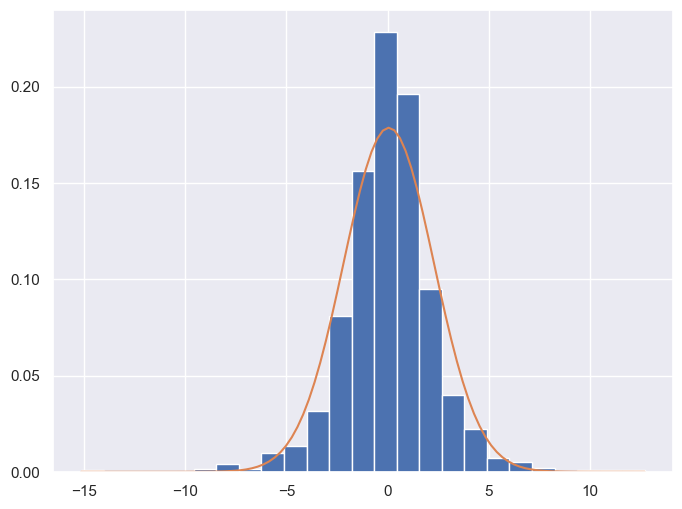

In [35]:
plt.hist(amzn_return, bins = 25, edgecolor='w', density= True)
data = np.linspace(mini, maxi, 100)
plt.plot(data, norm.pdf(data, mean, std));

### 12. Compare normally distributed sample with same attributes as amzn price change

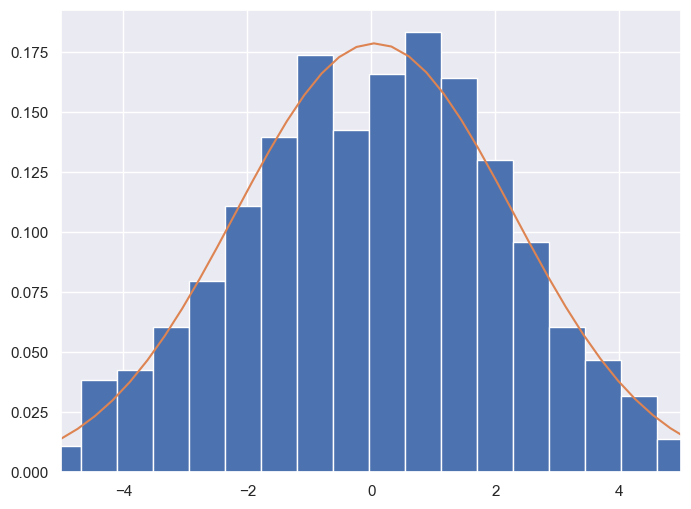

In [38]:
plt.hist(x, bins =25, density = True)
b = np.linspace(mini, maxi, 100)
plt.plot(b,stats.norm.pdf(b, mean, std))
plt.xlim(-5,5);

## Is daily price change significantly different from zero?

### 13. Conduct simple hypothesis test

In [42]:
stats.ttest_1samp(amzn_return.sample(252), 0, alternative='two-sided')

TtestResult(statistic=0.5640096588001698, pvalue=0.5732511544942871, df=251)

## Can price movement be described as a random walk?

### 14. Create price lags

In [43]:
amzn_close = pd.DataFrame(amzn.Close, columns= ['Close'])
amzn_close['lag_1'] = amzn_close.Close.shift(1)
amzn_close['lag_2'] = amzn_close.Close.shift(2)
amzn_close.dropna(inplace = True)
amzn_close.head()

,Close,lag_1,lag_2
Date,,,
2019-08-09 00:00:00-04:00,90.378998,91.644501,89.669998
2019-08-12 00:00:00-04:00,89.246002,90.378998,91.644501
2019-08-13 00:00:00-04:00,91.217003,89.246002,90.378998
2019-08-14 00:00:00-04:00,88.148003,91.217003,89.246002
2019-08-15 00:00:00-04:00,88.806000,88.148003,91.217003


### 15. Fit linear model

In [44]:
lr = np.linalg.lstsq(amzn_close[['lag_1', 'lag_2']], amzn_close.Close, rcond=None)[0]

In [45]:
amzn_close['predict'] = np.dot(amzn_close[['lag_1', 'lag_2']], lr)

In [46]:
amzn_close.head()

,Close,lag_1,lag_2,predict
Date,,,,
2019-08-09 00:00:00-04:00,90.378998,91.644501,89.669998,91.637209
2019-08-12 00:00:00-04:00,89.246002,90.378998,91.644501,90.408247
2019-08-13 00:00:00-04:00,91.217003,89.246002,90.378998,89.273561
2019-08-14 00:00:00-04:00,88.148003,91.217003,89.246002,91.209680
2019-08-15 00:00:00-04:00,88.806000,88.148003,91.217003,88.197340


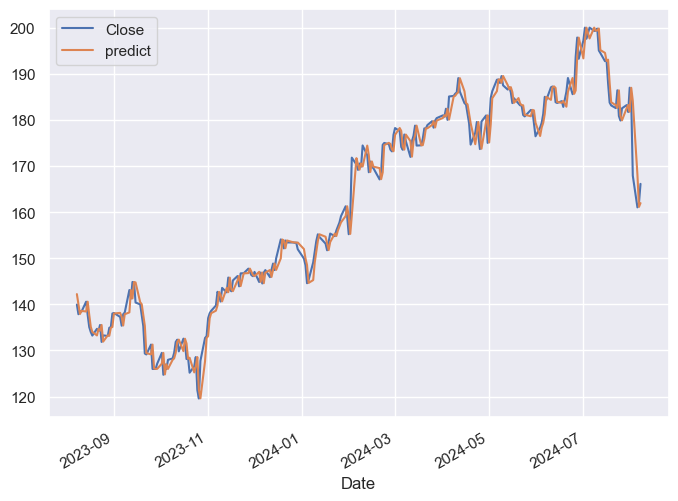

In [48]:
_ = amzn_close.iloc[-252:][['Close', 'predict']].plot()

C:\Users\jsullij9\AppData\Local\Temp\ipykernel_7496\2305482978.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sk_predict'] = model.predict(test[['lag_1', 'lag_2']])


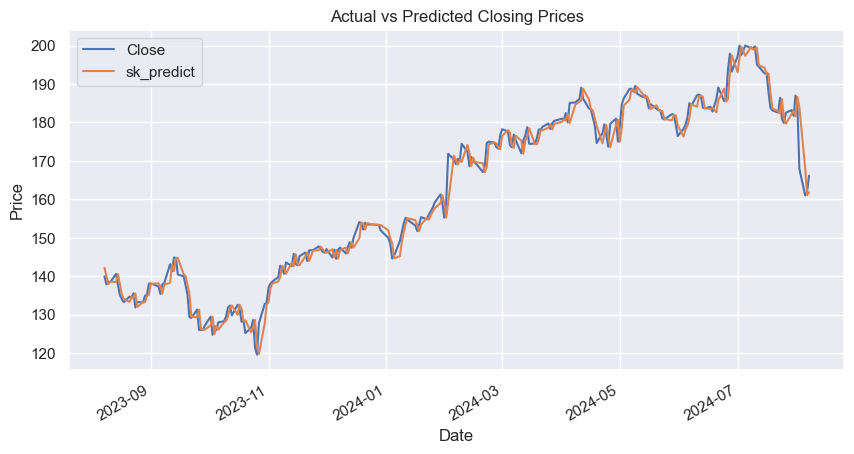

In [54]:
from sklearn.linear_model import LinearRegression

train = amzn_close.iloc[:-252]
test = amzn_close.iloc[-252:]

model = LinearRegression()
model.fit(train[['lag_1', 'lag_2']], train.Close)
test['sk_predict'] = model.predict(test[['lag_1', 'lag_2']])

_ = test[['Close', 'sk_predict']].plot(figsize=(10, 5), title='Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [61]:
change_df = pd.DataFrame({"actual_change": test["Close"].diff(), "predicted_change": test["sk_predict"].diff()}).dropna()
change_df['direction'] = np.sign(change_df['actual_change']) == np.sign(change_df['predicted_change'])
np.mean(change_df['direction'])

0.4940239043824701